In [14]:
## Tutorial on how to work with different flavours of web services for Earth Obersvation data
# 1. netCDF-CF-OPeNDAP using netcdf4 package
# 2. OGC WMS using owslib package
# 3. OGC WCS using owslib package
# For overview see OpenEarrth.eu > Data
from IPython.display import Image
Image(url='https://publicwiki.deltares.nl/download/attachments/42401809/OpenEarthBuildingBlocks_standards_client_server.png')

In [1]:
from netCDF4 import Dataset # includes OPeNDAP library

In [2]:
# define url and open dataset
url = 'http://thredds.jpl.nasa.gov/thredds/dodsC/ncml_aggregation/Chlorophyll/seawifs/aggregate__SEAWIFS_L3_CHLA_MONTHLY_9KM_R.ncml'
ds = Dataset(url)

In [3]:
# get time
print(ds.variables['time'][0],ds.variables['time'].units)
from netCDF4 import num2date
time = num2date(ds.variables['time'][:], units=ds.variables['time'].units)
print(time[0])

243 days since 1997-01-01
1997-09-01 00:00:00


In [4]:
# get full coordinate sticks so be able to make geographical selection
lon = ds.variables['lon'][:]
lat = ds.variables['lat'][:]
[lon[0],lat[0],lon[-1],lat[-1]]

[-179.95833332999999, 89.958333330000002, 179.95831894, -89.958326139999983]

In [5]:
# from bbox get netCDF-OPeNDAP subsetting indices
import numpy as np
bbox = [-10., 50., 15., 60.]
ilon = []
for i,il  in enumerate(lon):
    if (il >= bbox[0]) & (il <= bbox[2]):
        ilon.append(i)
ilat = []
for i,il  in enumerate(lat):
    if (il >= bbox[1]) & (il <= bbox[3]):
        ilat.append(i)
[ilon[0],ilat[0],ilon[-1],ilat[-1]]

[2040, 360, 2339, 479]

In [6]:
it = 0 # first
l3m_data = ds.variables['l3m_data'][it,ilat[0]:ilat[-1],ilon[0]:ilon[-1]]

In [7]:
l3m_data

masked_array(data =
 [[0.9353600144386292 0.9353600144386292 0.9677000045776367 ..., -- -- --]
 [1.0851999521255493 1.0851999521255493 0.7522500157356262 ..., -- -- --]
 [1.1441500186920166 1.0524699687957764 1.0524699687957764 ..., -- -- --]
 ..., 
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]
 [-- -- -- ..., -- -- --]],
             mask =
 [[False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 [False False False ...,  True  True  True]
 ..., 
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]
 [ True  True  True ...,  True  True  True]],
       fill_value = -32767.0)

In [8]:
clim = [0, 10]
print(clim)
[np.nanmin(l3m_data),np.max(l3m_data)]

[0, 10]


[0.28729999, 88.393517]

In [9]:
# close dataset
ds.close()

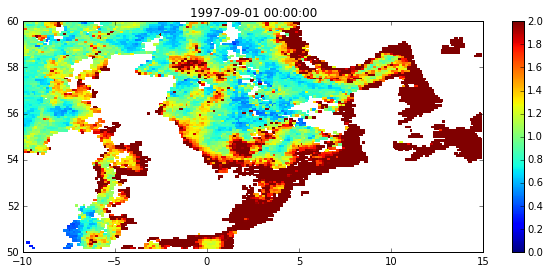

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
fig=plt.figure()
fig.set_figwidth(10)
ax = plt.axes([0.1,.8,0.8,0.8])
dd = 8
h = plt.pcolor(lon[ilon[0]:ilon[-1]],lat[ilat[0]:ilat[-1]],l3m_data)
h.set_clim([0, 2])
plt.colorbar()
plt.title(str(time[it]))